# SNR
Klasyfikacja ptaków na 260 gatunkach (ponad 35k zdjęć).

# Nowa sekcja

In [ ]:
from google.colab import drive
import torch
import logging
import shutil
import zipfile
import time

Lista rzeczy zrobionych:

*   1a) - uczenia tylko części klasyfikującej
*   1b) - sprawdzenie wyników trafności z 1a)
*   2a) - uczenie ostatniej warstwy splotowej
*   2b) - uczenie dwóch ostatnich warstw splotowych
*   2c) - uczenie całej sieci
*   2d) - uproszczenie struktury z 2c)
*   2e) - ewaluacja 2abcd
*   3a) - wizualizacja obszarów uwagi przy użyciu CAM dla 2abcd i 1a zrobione
*   3b) - wizualizacjia aktywacji wewnętrznych warstw przy wykorzystaniu Deep Dream (schemat jest)


Lista rzeczy do zrobienia:

*   1c) - uczenie SVM (LIN, QUAD, RBF) (sporo jest zrobione, ale jeszcze wiele do życzenia pozostawia - generalnie trzeba ogarnąć LIN i potem QUAD i RBF to kopie tego ze zmianą kernel'a. Aktualny problem to jakieś problemy numeryczne i standaryzacja danych przed svm.fit)
*   1d) - ewaluacja SVM (LIN, QUAD, RBF)
*   3a) - wizualizacja obszarów uwagi przy użyciu CAM (schemat jest, do podstawienia do modeli z 1c)
*   3b) - wizualizacjia aktywacji wewnętrznych warstw przy wykorzystaniu Deep Dream - przerunowac dla innych modeli









In [ ]:
#####################################################
# MAIN - main cell where everything will be started #
#####################################################
from google.colab import drive
import sys
from importlib import reload
import torch

print("Optimizing...")
torch.backends.cudnn.benchmark = True # optimize torch to hardware
print("Done!")

pathToPythonFolder = '/content/drive/MyDrive/260_Bird_Species/Python_code'
testfile = "/testowy.py"

sys.path.append(pathToPythonFolder)
print(sys.path)

drive.mount('/content/drive')


# RELOADING ALL FILES BEFORE IMPORTING ANYTHING FROM THE
import testowy
testowy = reload(testowy)
from testowy import pomachaj_mi
pomachaj_mi()

Optimizing...
Done!
['', '/content', '/env/python', '/usr/lib/python37.zip', '/usr/lib/python3.7', '/usr/lib/python3.7/lib-dynload', '/usr/local/lib/python3.7/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.7/dist-packages/IPython/extensions', '/root/.ipython', '/content/drive/MyDrive/260_Bird_Species/Python_code']
Mounted at /content/drive
You can import from Python_code folder now


Using CUDA
Loaded 36609 images under train
Loaded 1300 images under valid
Loaded 1300 images under test
Classes: 
['AFRICAN CROWNED CRANE', 'AFRICAN FIREFINCH', 'ALBATROSS', 'ALEXANDRINE PARAKEET', 'AMERICAN AVOCET', 'AMERICAN BITTERN', 'AMERICAN COOT', 'AMERICAN GOLDFINCH', 'AMERICAN KESTREL', 'AMERICAN PIPIT', 'AMERICAN REDSTART', 'ANHINGA', 'ANNAS HUMMINGBIRD', 'ANTBIRD', 'ARARIPE MANAKIN', 'ASIAN CRESTED IBIS', 'BALD EAGLE', 'BALI STARLING', 'BALTIMORE ORIOLE', 'BANANAQUIT', 'BANDED BROADBILL', 'BAR-TAILED GODWIT', 'BARN OWL', 'BARN SWALLOW', 'BARRED PUFFBIRD', 'BAY-BREASTED WARBLER', 'BEARDED BARBET', 'BELTED KINGFISHER', 'BIRD OF PARADISE', 'BLACK FRANCOLIN', 'BLACK SKIMMER', 'BLACK SWAN', 'BLACK TAIL CRAKE', 'BLACK THROATED WARBLER', 'BLACK VULTURE', 'BLACK-CAPPED CHICKADEE', 'BLACK-NECKED GREBE', 'BLACK-THROATED SPARROW', 'BLACKBURNIAM WARBLER', 'BLUE GROUSE', 'BLUE HERON', 'BOBOLINK', 'BROWN NOODY', 'BROWN THRASHER', 'CACTUS WREN', 'CALIFORNIA CONDOR', 'CALIFORNIA GULL', 'CALI

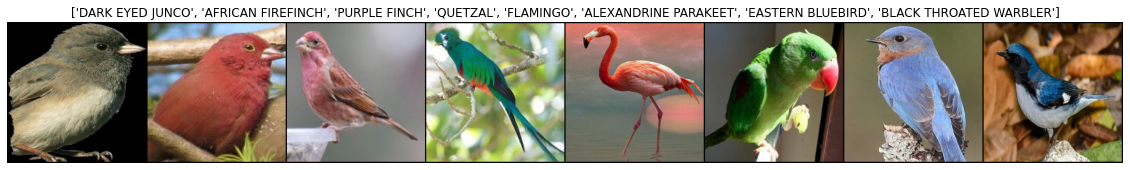

In [ ]:
# Loading DATA and creating DATALOADERS
from importlib import reload

import data
data = reload(data)
from data import create_dataloaders, show_databatch

import parameters
parameters = reload(parameters)
from parameters import TRAIN, PRESENTATION_BATCH

dataloaders, image_datasets, dataset_sizes = create_dataloaders()
class_names = image_datasets[TRAIN].classes

# Data batch presentation

inputs, classes = next(iter(dataloaders[TRAIN])) # Tensor and assigned class to it
inputs_pres = inputs[0:PRESENTATION_BATCH]
classes_pres = classes[0:PRESENTATION_BATCH]
show_databatch(inputs_pres, classes_pres, class_names) # batch_size images from batch

/content/drive/MyDrive/260_Bird_Species/Model_weights/Zad1a/ already exists
Loaded!
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
              ReLU-2         [-1, 64, 224, 224]               0
            Conv2d-3         [-1, 64, 224, 224]          36,928
              ReLU-4         [-1, 64, 224, 224]               0
         MaxPool2d-5         [-1, 64, 112, 112]               0
            Conv2d-6        [-1, 128, 112, 112]          73,856
              ReLU-7        [-1, 128, 112, 112]               0
            Conv2d-8        [-1, 128, 112, 112]         147,584
              ReLU-9        [-1, 128, 112, 112]               0
        MaxPool2d-10          [-1, 128, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]         295,168
             ReLU-12          [-1, 256, 56, 56]               0
           Conv2d-1

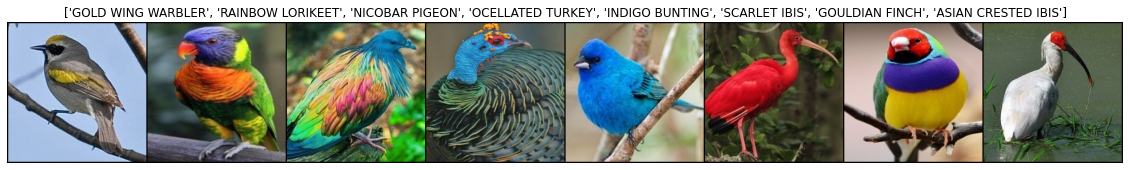

Prediction:


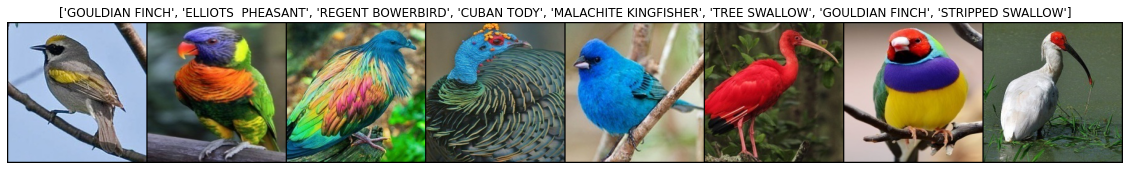

Epoch 1/50
----------
Training batch 180/183.5
Validation batch 10/13
Epoch 1 result: 
Avg loss (train): 0.0474
Avg acc (train): 0.1270
Avg loss (val): 0.0296
Avg acc (val): 0.4300
----------

Epoch 2/50
----------
Training batch 180/183.5
Validation batch 10/13
Epoch 2 result: 
Avg loss (train): 0.0261
Avg acc (train): 0.4136
Avg loss (val): 0.0135
Avg acc (val): 0.6915
----------

Epoch 3/50
----------
Training batch 180/183.5
Validation batch 10/13
Epoch 3 result: 
Avg loss (train): 0.0180
Avg acc (train): 0.5624
Avg loss (val): 0.0092
Avg acc (val): 0.7885
----------

Epoch 4/50
----------
Training batch 180/183.5
Validation batch 10/13
Epoch 4 result: 
Avg loss (train): 0.0146
Avg acc (train): 0.6365
Avg loss (val): 0.0072
Avg acc (val): 0.8208
----------

Epoch 5/50
----------
Training batch 180/183.5
Validation batch 10/13
Epoch 5 result: 
Avg loss (train): 0.0125
Avg acc (train): 0.6788
Avg loss (val): 0.0062
Avg acc (val): 0.8462
----------

Epoch 6/50
----------
Training batc

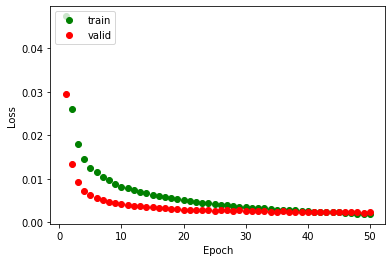

In [ ]:
from importlib import reload
import zadania
zadania = reload(zadania)
from zadania import zadanie1a
zadanie1a(class_names, dataloaders, dataset_sizes)

Loading pretrained model..
Loaded!
Test after training
Evaluating model
----------
Test batch 0/13AAAAA
tensor([253, 198, 146,  83,  60, 133, 125, 199, 213,   0,  38,  67, 191, 168,
         88,  26,  39,  36,  89, 183, 196, 131,  91, 245,  20, 150, 113,  62,
        215,  15, 241, 240, 130, 106, 135, 252,  48,   0, 221, 103,   5, 217,
        171,  38, 185, 200, 147, 247, 251, 205,  70,  82, 100,  86, 249,  77,
        227,  37, 256,   3, 251, 151, 229, 187, 206,  73, 134,  12,   2, 213,
        139, 258, 247, 209, 111, 174,  61, 135,  73,  38, 121, 203, 184,  82,
         48, 209,  94, 109, 149, 237, 119, 237, 197,  72, 189,  31, 129, 113,
         34,   2], device='cuda:0')
tensor([253, 198, 146,  83,  99, 133, 125, 199, 213,   0,  38,  67, 191, 168,
         88,  26,  39,  36,  89,  55, 196, 131,  91, 245,  20, 150, 113,  62,
        215,  15, 241, 240, 130, 106, 135, 252,  48,   0, 221, 103,   5, 217,
        171,  38, 185, 200, 147, 247, 251, 205,  61,  82, 100,  86, 249,  77,
  

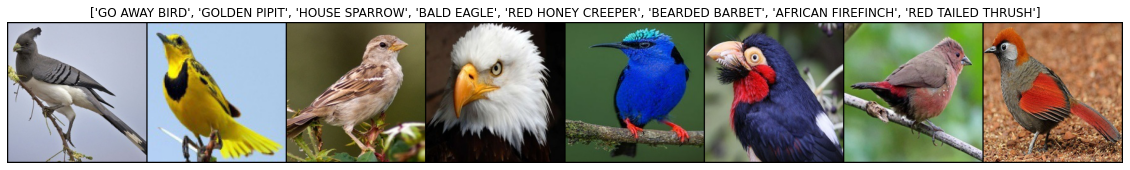

Prediction:


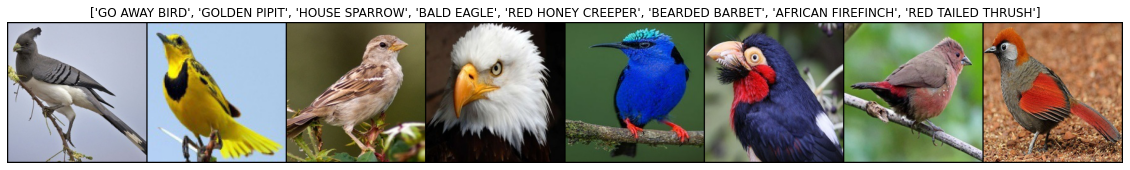

In [ ]:
from importlib import reload
import zadania
zadania = reload(zadania)
from zadania import zadanie1b
zadanie1b(class_names, dataloaders, dataset_sizes)

In [ ]:
from importlib import reload
import zadania
zadania = reload(zadania)
from zadania import zadanie1c_linearSVM
zadanie1c_linearSVM(class_names, dataloaders, dataset_sizes)

/content/drive/MyDrive/260_Bird_Species/Model_weights/Zad1cLIN/ already exists


Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth



VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
              ReLU-2         [-1, 64, 224, 224]               0
            Conv2d-3         [-1, 64, 224, 224]          36,928
              ReLU-4         [-1, 64, 224, 224]               0
         MaxPool2d-5         [-1, 64, 112, 112]               0
            Conv2d-6        [-1, 128, 112, 112]          73,856
              ReLU-7        [-1, 128, 112, 112]               0
            Conv2d-8        [-1, 128, 112, 112]         147,584
              ReLU-9        [-1, 128, 112, 112]               0
        MaxPool2d-10          [-1, 128, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]         295,168
             ReLU-12          [-1, 256, 56, 56]               0
           Conv2d-13          [-1, 256, 56, 56]         590,080
             ReLU-14          [-1, 256,

In [ ]:
from importlib import reload
import zadania
zadania = reload(zadania)
from zadania import zadanie1c_quadraticSVM
zadanie1c_quadraticSVM(class_names, dataloaders, dataset_sizes)

/content/drive/MyDrive/260_Bird_Species/Model_weights/Zad1cQUAD/ already exists
VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(

In [ ]:
from importlib import reload
import zadania
zadania = reload(zadania)
from zadania import zadanie1c_rbfSVM
zadanie1c_rbfSVM(class_names, dataloaders, dataset_sizes)

/content/drive/MyDrive/260_Bird_Species/Model_weights/Zad1cRBF/ already exists
VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(i

In [ ]:
import torchsummary
from torchsummary import summary

import parameters
parameters = reload(parameters)
from parameters import DEVICE, SUMMARY_SHAPE

import torchvision.models as models
VGG_16 = models.vgg16(pretrained=True)
VGG_16.cuda()
print(VGG_16)
summary(VGG_16, SUMMARY_SHAPE)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
from importlib import reload
import zadania
zadania = reload(zadania)
from zadania import zadanie1d_linearSVM
zadanie1d_linearSVM(class_names, dataloaders, dataset_sizes)

Linear kernel
Evaluating model
----------
Evaluating batch 10/13
Creating outputs

Evaluation completed in 10m 3s
Avg acc (test): 0.8462
----------


In [ ]:
from importlib import reload
import zadania
zadania = reload(zadania)
from zadania import zadanie1d_quadraticSVM
zadanie1d_quadraticSVM(class_names, dataloaders, dataset_sizes)

Quadratic kernel
Evaluating model
----------
Evaluating batch 10/13
Creating outputs

Evaluation completed in 2m 20s
Avg acc (test): 0.8308
----------


In [ ]:
from importlib import reload
import zadania
zadania = reload(zadania)
from zadania import zadanie1d_rbfSVM
zadanie1d_rbfSVM(class_names, dataloaders, dataset_sizes)

Rbf kernel
Evaluating model
----------
Evaluating batch 10/13
Creating outputs

Evaluation completed in 2m 30s
Avg acc (test): 0.8315
----------


/content/drive/MyDrive/260_Bird_Species/Model_weights/Zad2a/ already exists
Loaded!
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
              ReLU-2         [-1, 64, 224, 224]               0
            Conv2d-3         [-1, 64, 224, 224]          36,928
              ReLU-4         [-1, 64, 224, 224]               0
         MaxPool2d-5         [-1, 64, 112, 112]               0
            Conv2d-6        [-1, 128, 112, 112]          73,856
              ReLU-7        [-1, 128, 112, 112]               0
            Conv2d-8        [-1, 128, 112, 112]         147,584
              ReLU-9        [-1, 128, 112, 112]               0
        MaxPool2d-10          [-1, 128, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]         295,168
             ReLU-12          [-1, 256, 56, 56]               0
           Conv2d-1

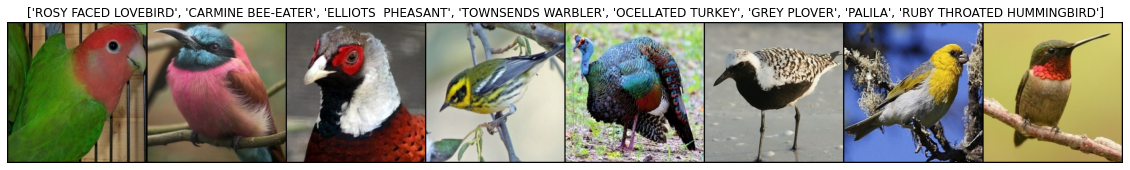

Prediction:


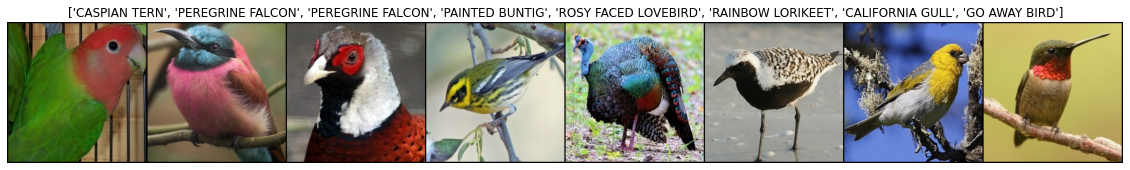

Epoch 1/50
----------
Training batch 180/183.5
Validation batch 10/13
Epoch 1 result: 
Avg loss (train): 0.0453
Avg acc (train): 0.1364
Avg loss (val): 0.0219
Avg acc (val): 0.5231
----------

Epoch 2/50
----------
Training batch 180/183.5
Validation batch 10/13
Epoch 2 result: 
Avg loss (train): 0.0214
Avg acc (train): 0.4809
Avg loss (val): 0.0092
Avg acc (val): 0.7900
----------

Epoch 3/50
----------
Training batch 180/183.5
Validation batch 10/13
Epoch 3 result: 
Avg loss (train): 0.0143
Avg acc (train): 0.6283
Avg loss (val): 0.0062
Avg acc (val): 0.8438
----------

Epoch 4/50
----------
Training batch 180/183.5
Validation batch 10/13
Epoch 4 result: 
Avg loss (train): 0.0114
Avg acc (train): 0.7022
Avg loss (val): 0.0051
Avg acc (val): 0.8646
----------

Epoch 5/50
----------
Training batch 180/183.5
Validation batch 10/13
Epoch 5 result: 
Avg loss (train): 0.0097
Avg acc (train): 0.7436
Avg loss (val): 0.0045
Avg acc (val): 0.8823
----------

Epoch 6/50
----------
Training batc

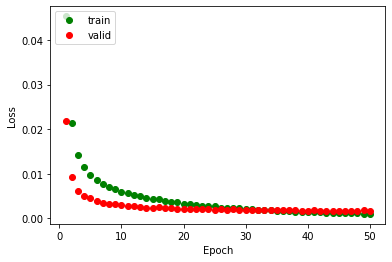

In [ ]:
from importlib import reload
import zadania
zadania = reload(zadania)
from zadania import zadanie2a
zadanie2a(class_names, dataloaders, dataset_sizes)

/content/drive/MyDrive/260_Bird_Species/Model_weights/Zad2b/ already exists
Loaded!
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
              ReLU-2         [-1, 64, 224, 224]               0
            Conv2d-3         [-1, 64, 224, 224]          36,928
              ReLU-4         [-1, 64, 224, 224]               0
         MaxPool2d-5         [-1, 64, 112, 112]               0
            Conv2d-6        [-1, 128, 112, 112]          73,856
              ReLU-7        [-1, 128, 112, 112]               0
            Conv2d-8        [-1, 128, 112, 112]         147,584
              ReLU-9        [-1, 128, 112, 112]               0
        MaxPool2d-10          [-1, 128, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]         295,168
             ReLU-12          [-1, 256, 56, 56]               0
           Conv2d-1

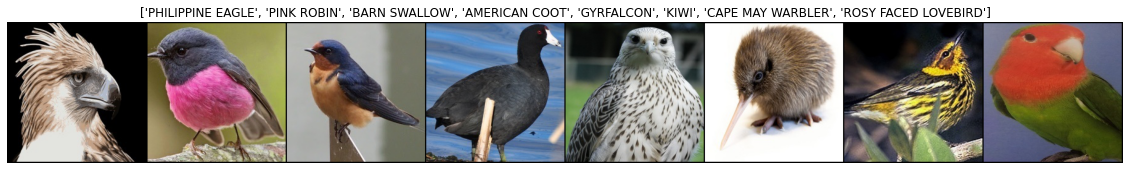

Prediction:


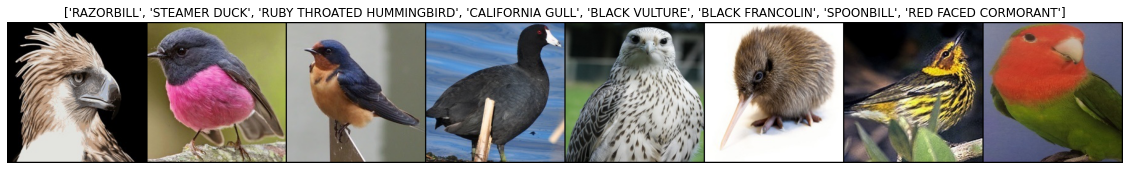

Epoch 1/50
----------
Training batch 180/183.5
Validation batch 10/13
Epoch 1 result: 
Avg loss (train): 0.0438
Avg acc (train): 0.1501
Avg loss (val): 0.0169
Avg acc (val): 0.6146
----------

Epoch 2/50
----------
Training batch 180/183.5
Validation batch 10/13
Epoch 2 result: 
Avg loss (train): 0.0180
Avg acc (train): 0.5482
Avg loss (val): 0.0073
Avg acc (val): 0.8177
----------

Epoch 3/50
----------
Training batch 180/183.5
Validation batch 10/13
Epoch 3 result: 
Avg loss (train): 0.0119
Avg acc (train): 0.6850
Avg loss (val): 0.0048
Avg acc (val): 0.8692
----------

Epoch 4/50
----------
Training batch 180/183.5
Validation batch 10/13
Epoch 4 result: 
Avg loss (train): 0.0094
Avg acc (train): 0.7493
Avg loss (val): 0.0038
Avg acc (val): 0.9023
----------

Epoch 5/50
----------
Training batch 180/183.5
Validation batch 10/13
Epoch 5 result: 
Avg loss (train): 0.0077
Avg acc (train): 0.7911
Avg loss (val): 0.0032
Avg acc (val): 0.9077
----------

Epoch 6/50
----------
Training batc

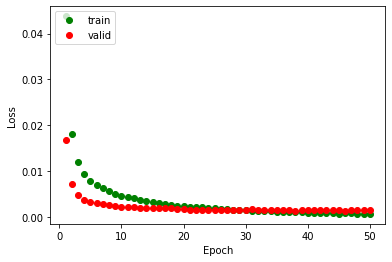

In [ ]:
from importlib import reload
import zadania
zadania = reload(zadania)
from zadania import zadanie2b
zadanie2b(class_names, dataloaders, dataset_sizes)

Loaded!
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
              ReLU-2         [-1, 64, 224, 224]               0
            Conv2d-3         [-1, 64, 224, 224]          36,928
              ReLU-4         [-1, 64, 224, 224]               0
         MaxPool2d-5         [-1, 64, 112, 112]               0
            Conv2d-6        [-1, 128, 112, 112]          73,856
              ReLU-7        [-1, 128, 112, 112]               0
            Conv2d-8        [-1, 128, 112, 112]         147,584
              ReLU-9        [-1, 128, 112, 112]               0
        MaxPool2d-10          [-1, 128, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]         295,168
             ReLU-12          [-1, 256, 56, 56]               0
           Conv2d-13          [-1, 256, 56, 56]         590,080
             ReLU-14          [

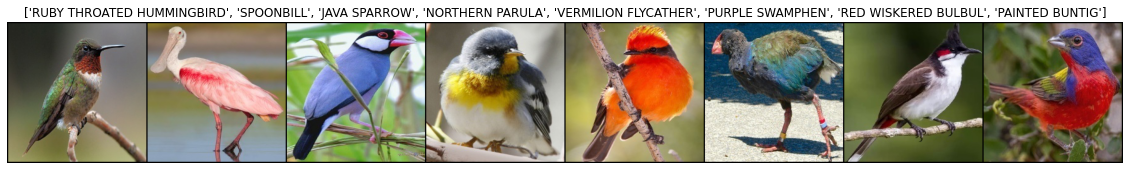

Prediction:


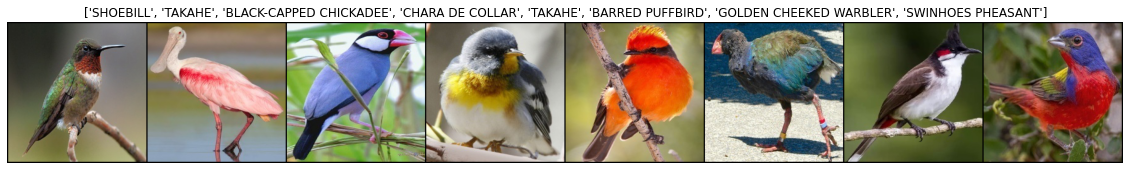

Epoch 1/50
----------
Training batch 180/183.5
Validation batch 10/13
Epoch 1 result: 
Avg loss (train): 0.0401
Avg acc (train): 0.2156
Avg loss (val): 0.0085
Avg acc (val): 0.7738
----------

Epoch 2/50
----------
Training batch 180/183.5
Validation batch 10/13
Epoch 2 result: 
Avg loss (train): 0.0112
Avg acc (train): 0.7082
Avg loss (val): 0.0030
Avg acc (val): 0.9192
----------

Epoch 3/50
----------
Training batch 180/183.5
Validation batch 10/13
Epoch 3 result: 
Avg loss (train): 0.0069
Avg acc (train): 0.8132
Avg loss (val): 0.0024
Avg acc (val): 0.9346
----------

Epoch 4/50
----------
Training batch 180/183.5
Validation batch 10/13
Epoch 4 result: 
Avg loss (train): 0.0055
Avg acc (train): 0.8532
Avg loss (val): 0.0021
Avg acc (val): 0.9431
----------

Epoch 5/50
----------
Training batch 180/183.5
Validation batch 10/13
Epoch 5 result: 
Avg loss (train): 0.0045
Avg acc (train): 0.8811
Avg loss (val): 0.0017
Avg acc (val): 0.9523
----------

Epoch 6/50
----------
Training batc

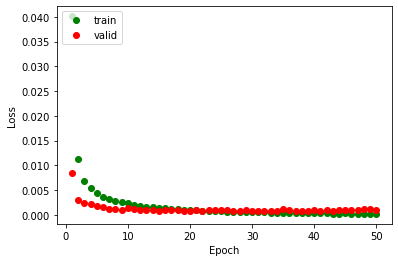

In [ ]:
from importlib import reload
import zadania
zadania = reload(zadania)
from zadania import zadanie2c
zadanie2c(class_names, dataloaders, dataset_sizes)

/content/drive/MyDrive/260_Bird_Species/Model_weights/Zad2d/ already exists
VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inpl

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Test batch 0/13
AAAAA
tensor([179,  45, 179,  91,  91,  91, 245, 152,  50,  91, 179, 245,  91,  91,
         91,  91,  91, 195,  91,  45, 179,  91, 179,  91,  91,  91, 111,  38,
         45,  91,  50, 195, 179,  45, 111,  91,  91,  50,  91,  54, 111,  91,
         38,  91,  91,  91,  45, 195,  45,  91,  91,  91,  50, 152, 179, 245,
        243,  50,  91, 152,  91,  94,  91,  45,  91, 195,  45,  50,  94, 179,
         91, 111,  91, 195,  91,  91, 111,  45,  45,  91,  91,  38,  91, 203,
         91, 152,  50,  91, 152,  91, 179, 111,  91,  91, 179,  91, 152, 195,
         91, 179], device='cuda:0')
tensor([ 66, 167, 206, 241,   0, 201,  30, 135,  64, 161, 145, 203, 192, 151,
        253, 206, 216, 160, 233, 182, 136,  10, 231, 176, 239,  70,  41,  74,
        227,   4,  23, 236, 181, 111, 177,  54, 251,  46, 198, 192, 101, 258,
         90,  24, 184, 157,  25,  35, 216,  14, 137, 152,  89, 126,  18, 127,
        208,  77,  86,  16,  64,  79, 227, 116, 212, 179, 147,  64,   6,  47,
      

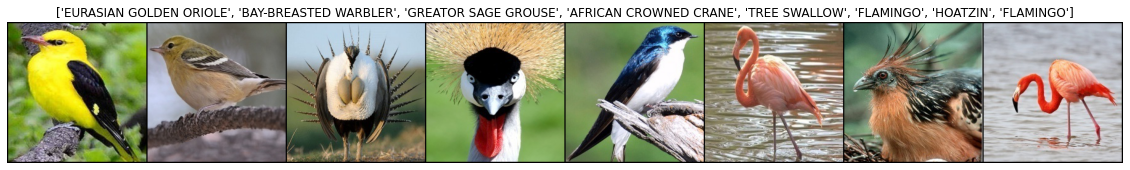

Prediction:


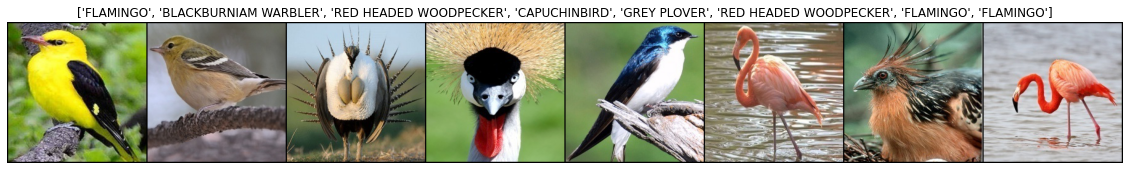

Epoch 1/50
----------
Training batch 180/183.5
Validation batch 10/13
Epoch 1 result: 
Avg loss (train): 0.0559
Avg acc (train): 0.0048
Avg loss (val): 0.0556
Avg acc (val): 0.0023
----------

Epoch 2/50
----------
Training batch 180/183.5
Validation batch 10/13
Epoch 2 result: 
Avg loss (train): 0.0559
Avg acc (train): 0.0066
Avg loss (val): 0.0556
Avg acc (val): 0.0069
----------

Epoch 3/50
----------
Training batch 180/183.5
Validation batch 10/13
Epoch 3 result: 
Avg loss (train): 0.0558
Avg acc (train): 0.0068
Avg loss (val): 0.0555
Avg acc (val): 0.0038
----------

Epoch 4/50
----------
Training batch 180/183.5
Validation batch 10/13
Epoch 4 result: 
Avg loss (train): 0.0554
Avg acc (train): 0.0076
Avg loss (val): 0.0550
Avg acc (val): 0.0062
----------

Epoch 5/50
----------
Training batch 180/183.5
Validation batch 10/13
Epoch 5 result: 
Avg loss (train): 0.0547
Avg acc (train): 0.0121
Avg loss (val): 0.0536
Avg acc (val): 0.0185
----------

Epoch 6/50
----------
Training batc

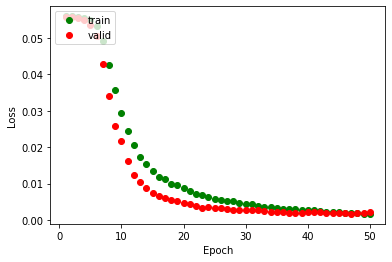

In [ ]:
from importlib import reload
import zadania
zadania = reload(zadania)
from zadania import zadanie2d
zadanie2d(class_names, dataloaders, dataset_sizes)

Analiza 2d
VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0,

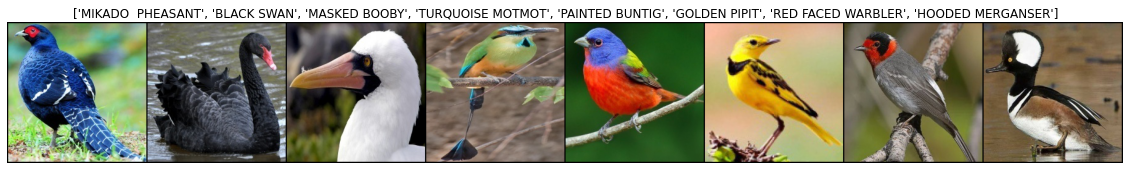

Prediction:


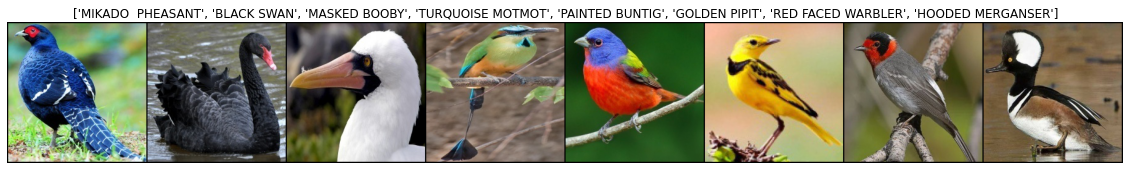

Porównanie wykresow


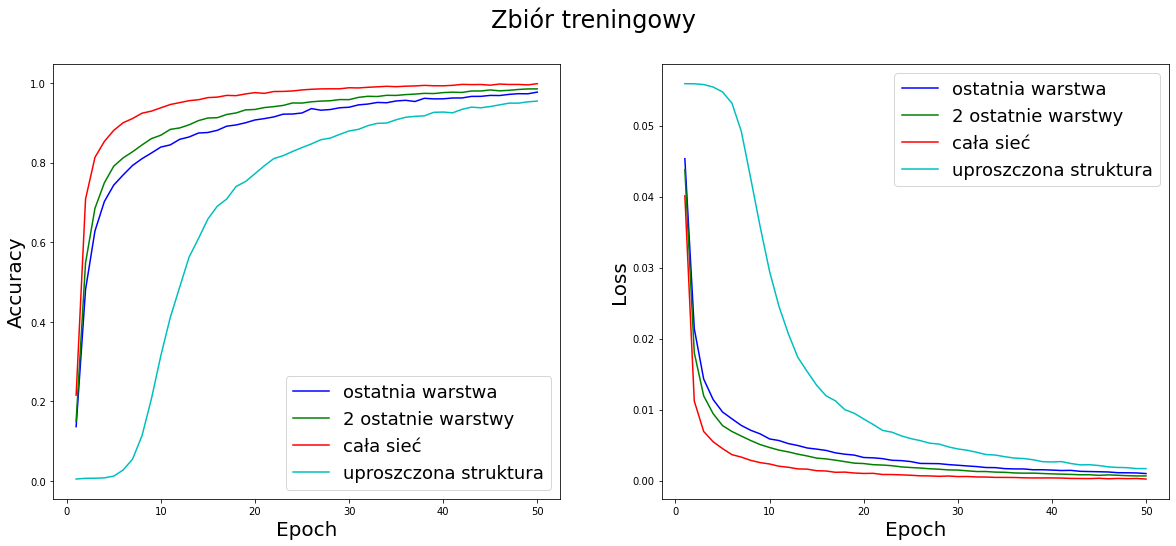

In [ ]:
from importlib import reload
import zadania
zadania = reload(zadania)
from zadania import analiza2a, analiza2b, analiza2c, analiza2d, porownanie_modeli_wykres

# analiza2a(class_names, dataloaders, dataset_sizes)
# analiza2b(class_names, dataloaders, dataset_sizes)
# analiza2c(class_names, dataloaders, dataset_sizes)
analiza2d(class_names, dataloaders, dataset_sizes)

porownanie_modeli_wykres()

In [ ]:
# ZADANIE 3A
from importlib import reload
import zadania
import data
data = reload(data)
zadania = reload(zadania)
from zadania import zadanie3a

# zadanie3a()

# based on https://leslietj.github.io/2020/06/08/PyTorch-Implementation-for-Grad-CAM/
import torch
import torchvision
import torch.utils.data as Data
import numpy as np
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import cv2
import matplotlib.image as mpimg

from models import create_model_ex2a, create_model_ex2b, create_model_ex2c, create_model_ex2d, create_model_ex1a
from model_functions import load_weights
from parameters import DEVICE, TEST, MODEL_PATH_EX2a, MODEL_PATH_EX2b, MODEL_PATH_EX2c, MODEL_PATH_EX2d, MODEL_PATH_EX1a
from torchsummary import summary
from data import imshow, create_dataloaders

model_1a = create_model_ex1a(class_names)
model_1a = load_weights(model_1a, MODEL_PATH_EX1a, resume_training = True)

model_2a = create_model_ex2a(class_names)
model_2a = load_weights(model_2a, MODEL_PATH_EX2a, resume_training = True)

model_2b = create_model_ex2b(class_names)
model_2b = load_weights(model_2b, MODEL_PATH_EX2b, resume_training = True)

model_2c = create_model_ex2c(class_names)
model_2c = load_weights(model_2c, MODEL_PATH_EX2c, resume_training = True)

model_2d = create_model_ex2d(class_names)
model_2d = load_weights(model_2d, MODEL_PATH_EX2d, resume_training = True)


# dataloader with one picture (from cam folder)
data_transform = transforms.Compose([
          transforms.ToTensor()
])
dataset = torchvision.datasets.ImageFolder(root="/content/drive/MyDrive/260_Bird_Species/cam/", transform=data_transform)

dataloader = Data.DataLoader(dataset=dataset, shuffle=False, batch_size=1)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth



Loading pretrained model..
Loaded!
Loading pretrained model..
Loaded!
Loading pretrained model..
Loaded!
Loading pretrained model..
Loaded!
Loading pretrained model..
Loaded!


In [ ]:
# register a hook
class VGG(torch.nn.Module):
    def __init__(self, model_2x):
        super(VGG, self).__init__()
        self.vgg = model_2x
        self.features_conv = self.vgg.features[:-1]
        self.max_pool = torch.nn.MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
        self.avg_pool = self.vgg.avgpool
        self.classifier = self.vgg.classifier
        self.gradients = None

    def activations_hook(self, grad):
        self.gradients = grad
        
    def forward(self, x):
        x = self.features_conv(x)
        h = x.register_hook(self.activations_hook)
        x = self.max_pool(x)
        x = self.avg_pool(x)
        x = x.view((1, -1))
        x = self.classifier(x)
        return x

    def get_activations_gradient(self):
        return self.gradients

    def get_activations(self, x):
        return self.features_conv(x)

In [ ]:
image, label = next(iter(dataloader))

In [ ]:
# make prediction
def make_predction(model, image):
  model.eval()
  predictions = model(image)
  return predictions

In [ ]:
def get_heatmap(model, image, predictions):
  # CAM
  # get the score for class c
  # y_c.numpy().detach.shape -> (1,)
  y_c = predictions[:, 164]
  print('y_c = ', y_c)

  # get the gradient of the raw score w.r.t the parameters of the model
  y_c.backward()

  # pull the gradients out of the model
  # gradients.shape -> (1, 512, 14, 14), same as 
  # the shape of activations
  gradients = model.get_activations_gradient()

  # pool the gradients across the channels 
  # expression (1) in [Paper on Grad-CAM]
  # pooled_gradients.shape -> (512, )
  pooled_gradients = torch.mean(gradients, dim=[0, 2, 3])

  # get the activations of the last convolutional layer
  # activations.shape -> (1, 512, 14, 14), i.e., 512 feature
  # maps of spatial size 14x14
  activations = model.get_activations(image).detach()

  # weight the channels by corresponding gradients
  for i in range(512):
      activations[:, i, :, :] *= pooled_gradients[i]
      
  # average the channels of the activations
  # heatmap.shape -> (14, 14)
  heatmap = torch.mean(activations, dim=1).squeeze()

  # relu on top of the heatmap
  # expression (2) in [Paper on Grad-CAM]
  heatmap = np.maximum(heatmap.cpu(), 0)

  # normalize the heatmap
  heatmap /= torch.max(heatmap)

  # draw the heatmap
  plt.matshow(heatmap.squeeze())
  plt.show()
  return heatmap

In [ ]:
imshow(image.cpu()[0])

In [ ]:
def get_cam(heatmap):
  input_img = cv2.imread('/content/drive/MyDrive/260_Bird_Species/cam/african_crawned_crane/img1.jpg')
  heatmap = cv2.resize(heatmap.numpy(), (input_img.shape[1], input_img.shape[0]))
  heatmap = np.uint8(255 * heatmap)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  superimposed_img = heatmap * 0.5 + input_img # 0.5 is a transparency factor
  cv2.imwrite('/content/drive/MyDrive/260_Bird_Species/cam/african_crawned_crane/img1_map.jpg', superimposed_img)

  cam = mpimg.imread('/content/drive/MyDrive/260_Bird_Species/cam/african_crawned_crane/img1_map.jpg')
  plt.imshow(cam)
  plt.show()

y_c =  tensor([-2.2801], device='cuda:0', grad_fn=<SelectBackward>)


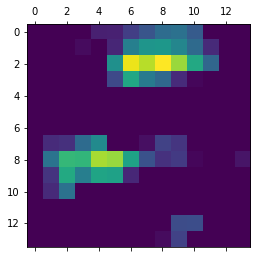

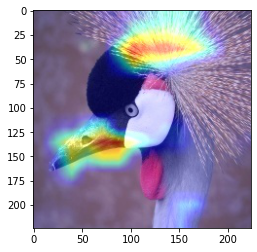

In [ ]:
# 3a -> 2a
model = VGG(model_2a)
image = image.to(DEVICE)

predictions = make_predction(model, image)
heatmap = get_heatmap(model, image, predictions)
get_cam(heatmap)

y_c =  tensor([-3.3288], device='cuda:0', grad_fn=<SelectBackward>)


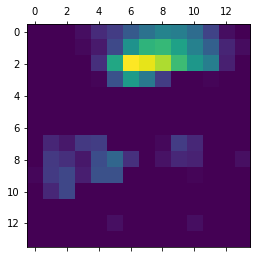

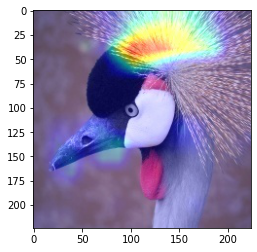

In [ ]:
# 3a -> 2b
model = VGG(model_2b)
image = image.to(DEVICE)

predictions = make_predction(model, image)
heatmap = get_heatmap(model, image, predictions)
get_cam(heatmap)

y_c =  tensor([-3.6691], device='cuda:0', grad_fn=<SelectBackward>)


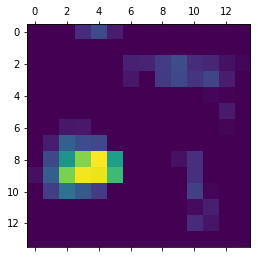

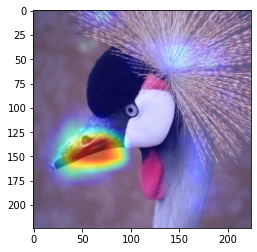

In [ ]:
# 3a -> 2c
model = VGG(model_2c)
image = image.to(DEVICE)

predictions = make_predction(model, image)
heatmap = get_heatmap(model, image, predictions)
get_cam(heatmap)

y_c =  tensor([-0.3384], device='cuda:0', grad_fn=<SelectBackward>)


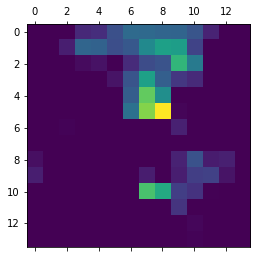

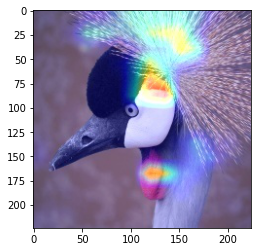

In [ ]:
# 3a -> 2d
model = VGG(model_2d)
image = image.to(DEVICE)

predictions = make_predction(model, image)
heatmap = get_heatmap(model, image, predictions)
get_cam(heatmap)

y_c =  tensor([-2.0891], device='cuda:0', grad_fn=<SelectBackward>)


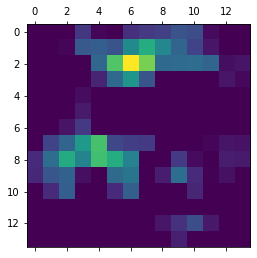

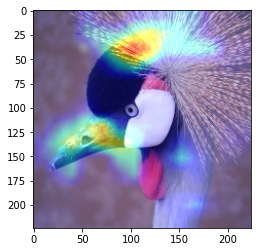

In [ ]:
# 3a -> 1a
# unfreeze layers
for param in model_1a.features.parameters():
  param.requires_grad = True

model = VGG(model_1a)
image = image.to(DEVICE)

predictions = make_predction(model, image)
heatmap = get_heatmap(model, image, predictions)
get_cam(heatmap)

In [ ]:
# ZADANIE 3B
from importlib import reload
import zadania
import data
data = reload(data)
zadania = reload(zadania)
from zadania import zadanie3b

# based on https://github.com/eriklindernoren/PyTorch-Deep-Dream
import torch
import torch.nn as nn
from torch.autograd import Variable
from torchvision import models
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import argparse
import os
import tqdm
import scipy.ndimage as nd

from parameters import DEVICE

img1 = '/content/drive/MyDrive/260_Bird_Species/deep_dream/elegant_trogon.jpg'
img2 = '/content/drive/MyDrive/260_Bird_Species/deep_dream/cat.jpg'

vgg = models.vgg16(pretrained=True)

In [ ]:
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])

preprocess = transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean, std)])

def deprocess(image_np):
    image_np = image_np.squeeze().transpose(1, 2, 0)
    image_np = image_np * std.reshape((1, 1, 3)) + mean.reshape((1, 1, 3))
    image_np = np.clip(image_np, 0.0, 255.0)
    return image_np


def clip(image_tensor):
    for c in range(3):
        m, s = mean[c], std[c]
        image_tensor[0, c] = torch.clamp(image_tensor[0, c], -m / s, (1 - m) / s)
    return image_tensor

In [ ]:
def dream(image, model, iterations, lr):
    """ Updates the image to maximize outputs for n iterations """
    Tensor = torch.cuda.FloatTensor if torch.cuda.is_available else torch.FloatTensor
    image = Variable(Tensor(image), requires_grad=True)
    for i in range(iterations):
        model.zero_grad()
        out = model(image)
        loss = out.norm()
        loss.backward()
        avg_grad = np.abs(image.grad.data.cpu().numpy()).mean()
        norm_lr = lr / avg_grad
        image.data += norm_lr * image.grad.data
        image.data = clip(image.data)
        image.grad.data.zero_()
    return image.cpu().data.numpy()

In [ ]:
def deep_dream(image, model, iterations, lr, octave_scale, num_octaves):
    """ Main deep dream method """
    image = preprocess(image).unsqueeze(0).cpu().data.numpy()

    # Extract image representations for each octave
    octaves = [image]
    for _ in range(num_octaves - 1):
        octaves.append(nd.zoom(octaves[-1], (1, 1, 1 / octave_scale, 1 / octave_scale), order=1))

    detail = np.zeros_like(octaves[-1])
    for octave, octave_base in enumerate(tqdm.tqdm(octaves[::-1], desc="Dreaming")):
        if octave > 0:
            # Upsample detail to new octave dimension
            detail = nd.zoom(detail, np.array(octave_base.shape) / np.array(detail.shape), order=1)
        # Add deep dream detail from previous octave to new base
        input_image = octave_base + detail
        # Get new deep dream image
        dreamed_image = dream(input_image, model, iterations, lr)
        # Extract deep dream details
        detail = dreamed_image - octave_base

    return deprocess(dreamed_image)

In [ ]:
def run_deep_dream(model, image, layer_nr):
  layers = list(model.features.children())
  model = nn.Sequential(*layers[: (layer_nr + 1)])
  model.cuda()
  deep_image = deep_dream(image, model, layer_nr, 0.01, 1.4, 10)
  plt.imshow(deep_image)

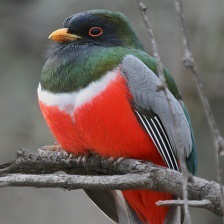

In [ ]:
image = Image.open(img1)
image

Dreaming: 100%|██████████| 10/10 [00:00<00:00, 50.41it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


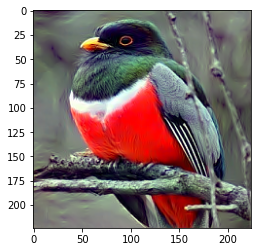

In [ ]:
run_deep_dream(vgg, image, 5)

Dreaming: 100%|██████████| 10/10 [00:00<00:00, 35.34it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


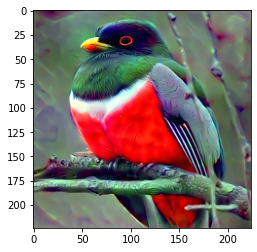

In [ ]:
run_deep_dream(vgg, image, 7)

Dreaming: 100%|██████████| 10/10 [00:00<00:00, 23.36it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


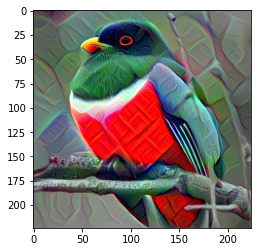

In [ ]:
run_deep_dream(vgg, image, 10)

Dreaming: 100%|██████████| 10/10 [00:00<00:00, 14.75it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


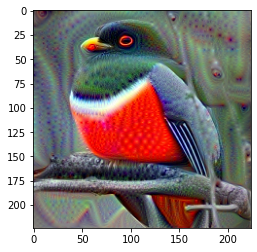

In [ ]:
run_deep_dream(vgg, image, 14)

Dreaming: 100%|██████████| 10/10 [00:00<00:00, 11.09it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


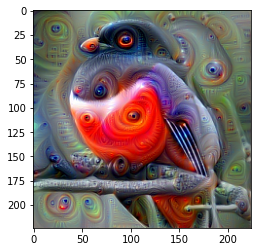

In [ ]:
run_deep_dream(vgg, image, 17)

Dreaming: 100%|██████████| 10/10 [00:01<00:00,  8.95it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


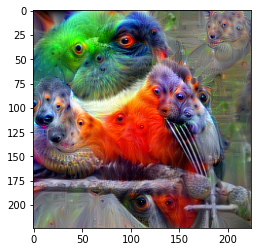

In [ ]:
run_deep_dream(vgg, image, 22)

Dreaming: 100%|██████████| 10/10 [00:00<00:00, 12.85it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


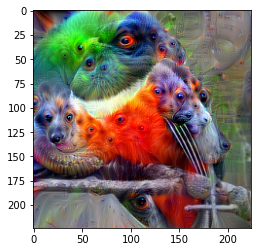

In [ ]:
run_deep_dream(model_1a, image, 22)

Dreaming: 100%|██████████| 10/10 [00:00<00:00, 12.96it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


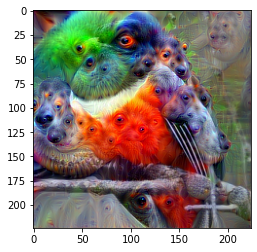

In [ ]:
run_deep_dream(model_2a, image, 22)

Dreaming: 100%|██████████| 10/10 [00:00<00:00, 12.91it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


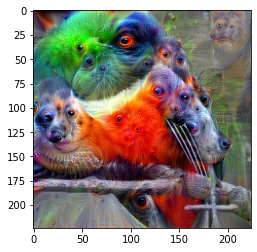

In [ ]:
run_deep_dream(model_2b, image, 22)

Dreaming: 100%|██████████| 10/10 [00:01<00:00,  8.94it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


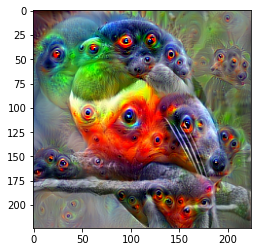

In [ ]:
run_deep_dream(model_2c, image, 22)

Dreaming: 100%|██████████| 10/10 [00:01<00:00,  8.89it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


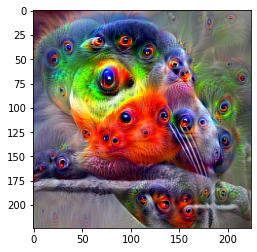

In [ ]:
run_deep_dream(model_2d, image, 22)

In [ ]:
# Confusion matrix
from importlib import reload
import zadania
zadania = reload(zadania)
from zadania import analiza2c

pred, lbl = analiza2c(class_names, dataloaders, dataset_sizes)

Analiza 2a
Loading pretrained model..
Loaded!
Test after training
Evaluating model
----------
Test batch 0/13
AAAAA
tensor([201, 148, 139, 156,  49, 234, 119, 248, 122,  66,  50,  68,  48, 119,
         69, 104, 231,   9, 167, 192, 195, 256,  35, 242,  29, 197,  16, 246,
         87, 245,  55, 188, 241,  75,  21,  61, 233, 209, 214,  59, 198, 207,
         82, 172,  60, 182, 165,  91, 164, 158,   9, 151,  56, 257, 133, 166,
        169, 138,   8, 246,  24, 178, 104, 108, 175, 118, 104, 199, 150, 188,
        121,  84, 120, 198, 116, 138,   8, 170, 229,  90,  59, 137, 244,  18,
        245,  37,  36, 234,  53, 204, 192, 169,  68, 161,  19, 116, 233,  45,
        233,  49], device='cuda:0')
tensor([201, 148, 139, 156,  49, 234, 119, 248, 122,  66,  50,  68,  48, 119,
         69, 104, 231,   9, 167, 192, 195, 256,  35, 242,  29, 197,  16, 246,
         87, 245,  55, 188, 241,  75,  21,  70, 233, 209, 210,  59, 198, 207,
         82, 172,  60, 182, 165,  91, 164, 158,   9, 151,  56, 257, 

Predictions len: 1300, unique: 260
Labels len: 1300, unique: 260
['AFRICAN CROWNED CRANE', 'AFRICAN FIREFINCH', 'ALBATROSS', 'ALEXANDRINE PARAKEET', 'AMERICAN AVOCET', 'AMERICAN BITTERN', 'AMERICAN COOT', 'AMERICAN GOLDFINCH', 'AMERICAN KESTREL', 'AMERICAN PIPIT', 'AMERICAN REDSTART', 'ANHINGA', 'ANNAS HUMMINGBIRD', 'ANTBIRD', 'ARARIPE MANAKIN', 'ASIAN CRESTED IBIS', 'BALD EAGLE', 'BALI STARLING', 'BALTIMORE ORIOLE', 'BANANAQUIT', 'BANDED BROADBILL', 'BAR-TAILED GODWIT', 'BARN OWL', 'BARN SWALLOW', 'BARRED PUFFBIRD', 'BAY-BREASTED WARBLER', 'BEARDED BARBET', 'BELTED KINGFISHER', 'BIRD OF PARADISE', 'BLACK FRANCOLIN', 'BLACK SKIMMER', 'BLACK SWAN', 'BLACK TAIL CRAKE', 'BLACK THROATED WARBLER', 'BLACK VULTURE', 'BLACK-CAPPED CHICKADEE', 'BLACK-NECKED GREBE', 'BLACK-THROATED SPARROW', 'BLACKBURNIAM WARBLER', 'BLUE GROUSE', 'BLUE HERON', 'BOBOLINK', 'BROWN NOODY', 'BROWN THRASHER', 'CACTUS WREN', 'CALIFORNIA CONDOR', 'CALIFORNIA GULL', 'CALIFORNIA QUAIL', 'CANARY', 'CAPE MAY WARBLER', 'CAP

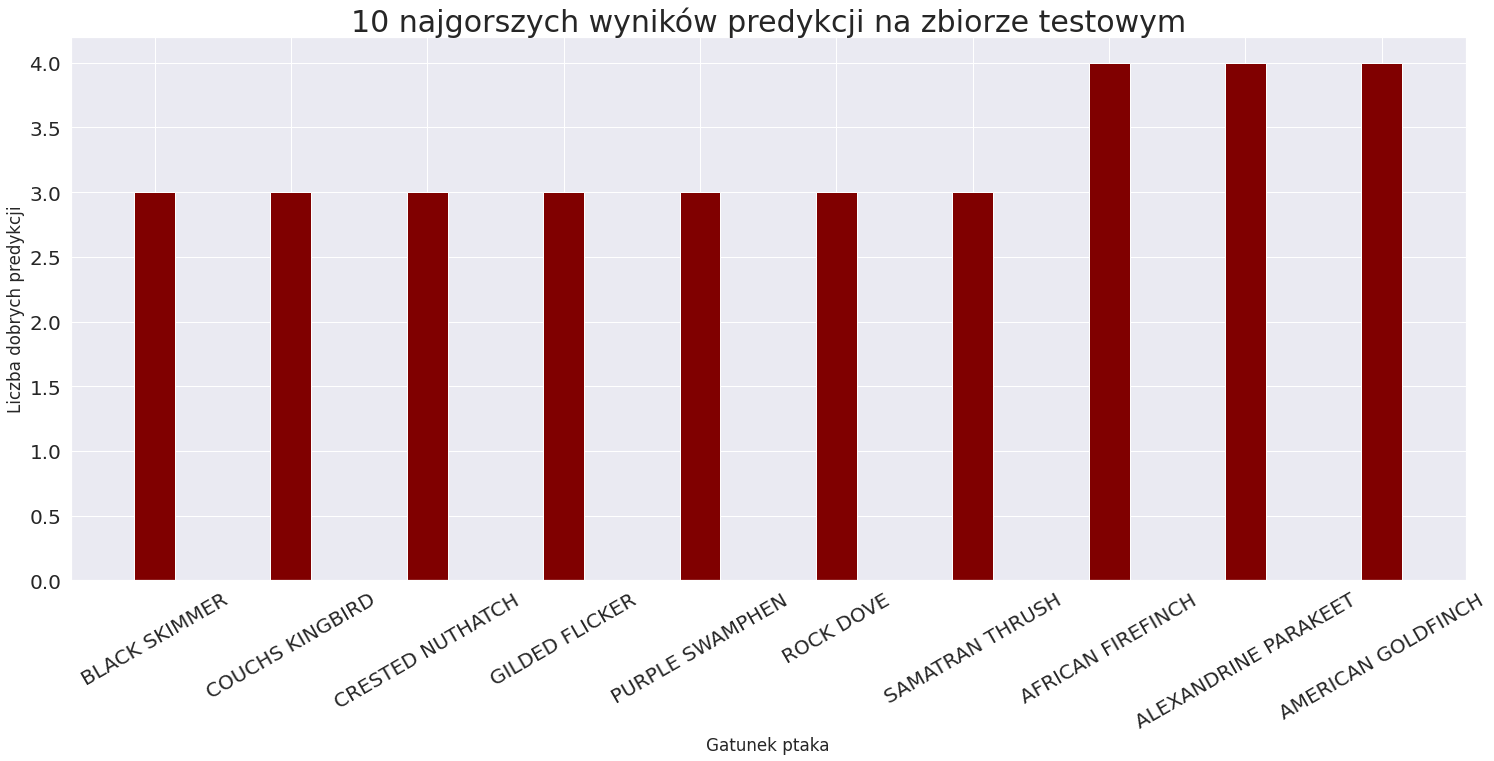

Ptak BLACK SKIMMER został pomylony z: ['STORK BILLED KINGFISHER', 'MARABOU STORK']
Ptak COUCHS KINGBIRD został pomylony z: ['CANARY', 'VERMILION FLYCATHER']
Ptak CRESTED NUTHATCH został pomylony z: ['TIT MOUSE']
Ptak GILDED FLICKER został pomylony z: ['NORTHERN FLICKER']
Ptak PURPLE SWAMPHEN został pomylony z: ['TAKAHE', 'TAIWAN MAGPIE']
Ptak ROCK DOVE został pomylony z: ['HIMALAYAN MONAL', 'TRUMPTER SWAN']
Ptak SAMATRAN THRUSH został pomylony z: ['BLACK-CAPPED CHICKADEE', 'SHOEBILL']
Ptak AFRICAN FIREFINCH został pomylony z: ['STRAWBERRY FINCH']
Ptak ALEXANDRINE PARAKEET został pomylony z: ['MASKED BOOBY']
Ptak AMERICAN GOLDFINCH został pomylony z: ['CANARY']


In [ ]:
import sklearn as sk
import seaborn as sn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def return_10_worst (results, names, n):
  # [idx1, idx2, ..]
  r = {i: value for i, value in enumerate(results)}
  sorted_r = dict(sorted(r.items(), key=lambda item: item[1]))
  n_items = list(sorted_r.keys())[:n]
  n_res = list(sorted_r.values())[:n]
  return n_items, n_res

def plot_results(x, y):
  x = [class_names[i] for i in x]
  fig = plt.figure(figsize = (25, 10))
  plt.bar(x, y, color ='maroon',
          width = 0.3)
  plt.title("10 najgorszych wyników predykcji na zbiorze testowym", fontsize=30)
  plt.xlabel("Gatunek ptaka")
  plt.ylabel("Liczba dobrych predykcji")
  plt.xticks(rotation=30, fontsize=20)
  plt.yticks(fontsize=20)
  plt.show()

def get_mistaken_birds(worst_idx, prediction, real_labels, names):
  for idx in worst_idx:
    raw_birds = [int(prediction[i]) for i, v in enumerate(real_labels) if v == idx]
    birds = set(raw_birds)
    birds.remove(idx)
    birds_name = [names[i] for i in birds]
    print(f"Ptak {names[idx]} został pomylony z: {birds_name}")


print(f"Predictions len: {len(pred)}, unique: {len(set(pred))}")
print(f"Labels len: {len(lbl)}, unique: {len(set(lbl))}")
print(class_names)

array = sk.metrics.confusion_matrix(lbl, pred, labels = range(260))
diag = np.diagonal(array)

x_worst, y_worst = return_10_worst(diag, class_names, 10)
plot_results(x_worst, y_worst)
get_mistaken_birds(x_worst, pred, lbl, class_names)